# Unsupervised Machine Learning: Clustering
## Contents

* 1) Import libraries and datasets
* 2) Preparing the data for the k-means algorithm
* 3) The elbow technique
* 4) k-means clustering
* 5) Displaying Results
* 6) Final Thoughts


## 1) Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
path = '/Users/calebhill/Project 6'

In [4]:
file = 'cars_df_clean.csv'

In [5]:
df = pd.read_csv(os.path.join(path, 'Data','Prepared Data', file),index_col = 0)

In [6]:
df.head()

,price,brand,year,title_status,mileage,color,state,country,condition
0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [7]:
df.shape

(2495, 9)

## 2) Preparing the data for the k-means algorithm

In [8]:
df = df[['price','year', 'mileage']].copy()

In [9]:
#removes outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [10]:
df.shape

(2401, 3)

## 3) The elbow technique

In [11]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

/Users/calebhill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/calebhill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/calebhill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/calebhill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

[-3789116783016.0547,
 -1235544888213.0493,
 -783483770137.7539,
 -534168084229.5441,
 -424165774455.20233,
 -357234522614.03094,
 -298469767814.0196,
 -263835997458.7683,
 -233712260993.08292]

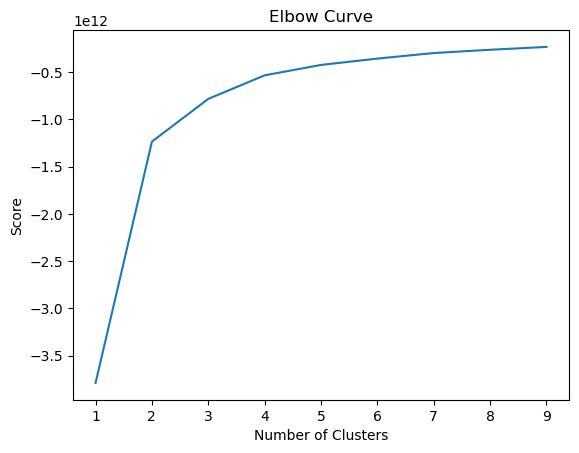

In [13]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4) k-means clustering

In [14]:
kmeans = KMeans(n_clusters = 3) 
#I chose to have three clusters because after 3 the curve begins to flatten 

In [15]:
kmeans.fit(df)

/Users/calebhill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

/Users/calebhill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df['clusters'].value_counts()

clusters
1    1720
2     489
0     192
Name: count, dtype: int64

## 5) Displaying Results

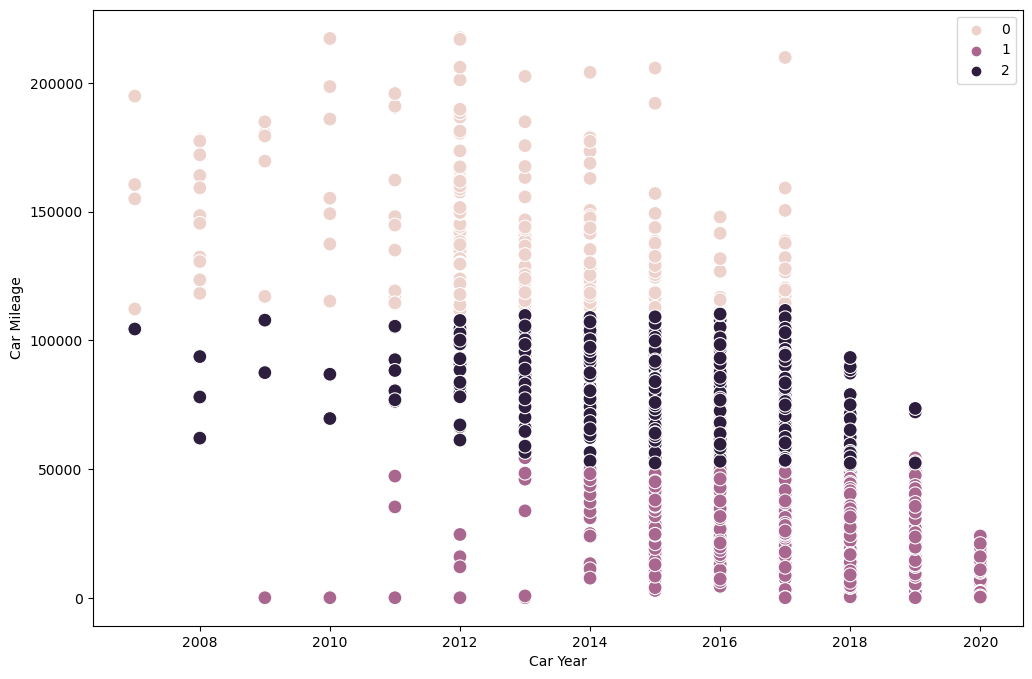

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year'], y=df['mileage'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Car Year')
plt.ylabel('Car Mileage') 
plt.show()

      The clusters seem to make sense because they are separated into three 
      distinct groups: <50,000 ; 50-110000 ; >110000 . There are also no cars 
      before 2009 within the "1" cluster and no cars in 2020 with more than   
      50,000 miles.

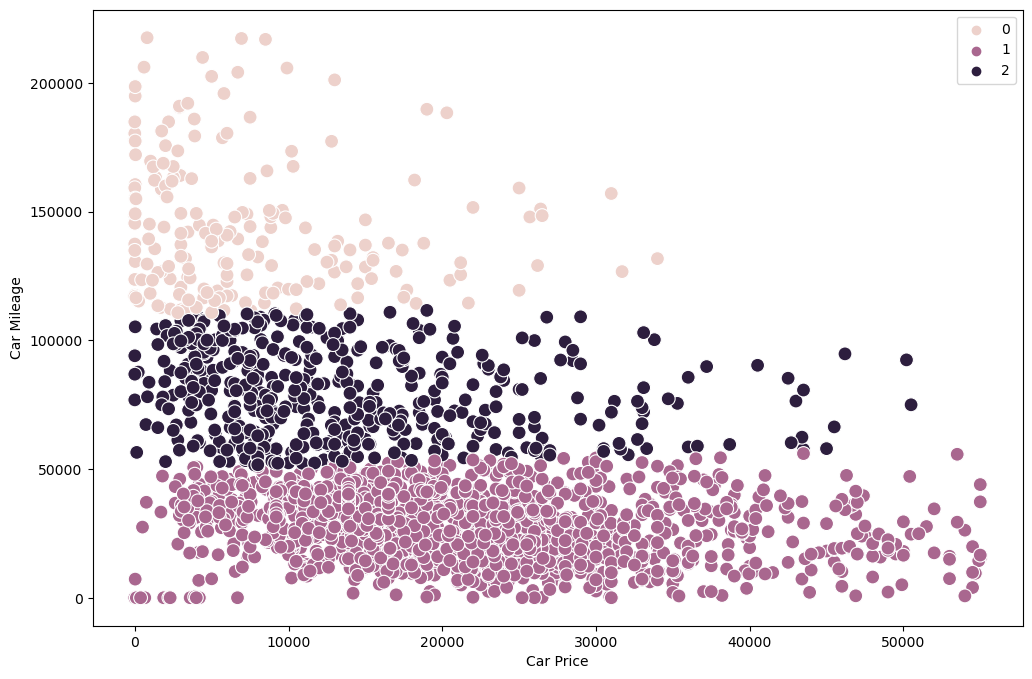

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['mileage'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Car Price') 
plt.ylabel('Car Mileage') 
plt.show()

    These clusters also make sense as they stick to three separate sections of 
    the scatterplot similar to the previous one in regards to the mileage. It's 
    also worth noting that there are no "2" points after $35,000, and no "0" 
points after $50,000, which makes sense because cars with less mileage are 
    generally worth more.

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'year':['mean', 'median'], 
                         'mileage':['mean', 'median']})

price                  year                mileage  \
                     mean   median         mean  median           mean   
cluster                                                                  
dark purple  13504.640082  11000.0  2015.288344  2015.0   78614.165644   
pink          7441.635417   5340.0  2012.828125  2013.0  143982.994792   
purple       21582.838953  20179.5  2018.094186  2019.0   27420.886047   

                       
               median  
cluster                
dark purple   77392.0  
pink         137758.5  
purple        28266.0

In [26]:
df.to_csv(os.path.join(path, 'data', 'prepared data', 'cars_df_clean_clusters.csv'))

In [23]:
df.head()

,price,year,mileage,clusters,cluster
1,2899,2011,190552.0,0,pink
2,5350,2018,39590.0,1,purple
3,25000,2014,64146.0,2,dark purple
4,27700,2018,6654.0,1,purple
5,5700,2018,45561.0,1,purple


## 6) Final Thoughts

* Purple has the highest price and year while having the lowest mileage, with dark purple having the opposite qualities, and pink falling in the middle.

* Because the three clusters correlate with the price, year and mileage, it would be useful to rename them with classifications like average_quality, high_quality and low_quality, then use those with the categorical variables to determine if theres any correlation between them.